In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv("C:\\Users\\sanja\\Downloads\\framingham.csv")
df.sample(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1690,0,43,1.0,1,20.0,0.0,0,0,0,259.0,120.0,87.0,19.88,86.0,71.0,0
1023,0,57,1.0,0,0.0,0.0,0,0,0,277.0,133.0,84.0,36.21,62.0,74.0,0
145,1,48,4.0,0,0.0,0.0,0,1,0,293.0,149.0,100.0,31.61,87.0,76.0,1
1517,0,56,3.0,0,0.0,0.0,0,0,0,248.0,112.5,60.0,22.69,75.0,92.0,0
1747,0,51,1.0,0,0.0,0.0,0,0,0,NaN,130.0,89.5,NaN,80.0,NaN,0


In [8]:
df.shape

(4238, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [10]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [48]:
df.dropna(axis=0,inplace=True)

In [12]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [13]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [21]:
df['male'] = df['male'].replace({1:'male',0:'female'})
df.rename(columns={'male':'Gender'},inplace=True)

In [22]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,male,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,female,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,male,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,female,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,female,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<Axes: >

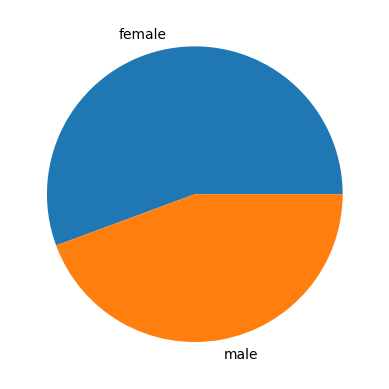

In [24]:
df.value_counts('Gender').plot(kind='pie')

In [27]:
pd.crosstab(df['Gender'],df['TenYearCHD'],normalize=True)*100

TenYearCHD,0,1
Gender,,
female,48.796499,6.838074
male,35.968271,8.397155


In [30]:
temp_df = df[df['TenYearCHD'] == 1]

<Axes: ylabel='Frequency'>

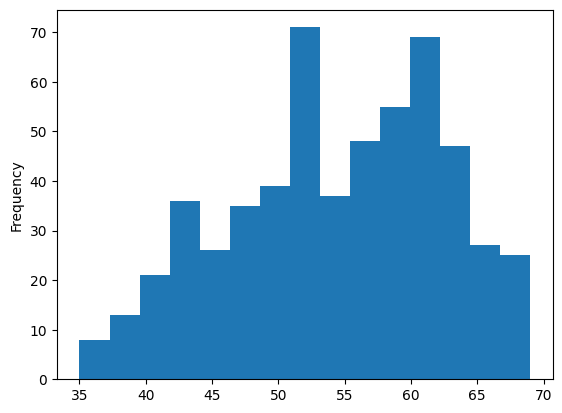

In [33]:
temp_df['age'].plot(kind='hist',bins=15)

In [34]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,male,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,female,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,male,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,female,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,female,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [39]:
pd.crosstab(index=df['TenYearCHD'], columns=df['education'],normalize=True)*100

education,1.0,2.0,3.0,4.0
TenYearCHD,,,,
0,33.780088,26.531729,14.524070,9.928884
1,7.959519,3.583151,2.051422,1.641138


In [40]:
from sklearn.linear_model import LogisticRegression

In [49]:
x = df.iloc[:,:-1]
y = df['TenYearCHD']

In [50]:
l = LogisticRegression()

In [51]:
l.fit(x,y)

c:\Users\sanja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
import time
import pyautogui
import subprocess
result = subprocess.run(["pip", "install","pyautogui"], capture_output=True, text=True)
print(result.stdout)
pyautogui.hotkey('win','m')
for i in range(0, 20):
    arrow = ['up','left','down','right'][i%4]
    pyautogui.hotkey('ctrl','alt',arrow)
    time.sleep(1.5)

In [1]:
income = ["10k","15k","20k","30k","40k","60k","80k","100k","120k","140k","170k","200k","250k","300k","400k","500k","1m","5m","50m","100m","500m","1B"]

In [2]:
count = [0000,100000,95000,90000,930000,83000,85000,86000,]

22